# Introduction to NLP fundamentals 

In [2]:
print('Happy learning 😊🖥️')

Happy learning 😊🖥️


In [3]:
from helper_functions import unzip_data,create_tensorboard_callback,plot_loss_curves,compare_historys

## Get a text dataset 

We will be using a kaggle dataset
([dataset_link](https://www.kaggle.com/competitions/nlp-getting-started/data))

In [4]:
unzip_data('nlp_getting_started.zip')

## Visualizing a text dataset 

In [5]:
import pandas as pd 

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df['text'][2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [8]:
# Shuffle training dataframe 

train_df_shuffled = train_df.sample(frac=1,random_state=42)

train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
# Test dataset
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
# How many examplesof each class

train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [11]:
# number of samples
len(train_df) ,len(test_df)

(7613, 3263)

In [12]:
# lets visualize some random training examples 

import random

random_index = random.randint(0,len(train_df)-5)

for row in train_df_shuffled[['text','target']][random_index:random_index+5].itertuples():
    _,text,target = row 
    print(f'Target: {target}' ,'(real disaster)'  if target > 0 else "(not a real disaster)")
    print(f'Text:\n{text}\n')
    print('----\n')


Target: 1 (real disaster)
Text:
Memphis always floods

----

Target: 0 (not a real disaster)
Text:
@_wildfire__ ???? Bruh that's the lady from Mulan!!

----

Target: 0 (not a real disaster)
Text:
I liked a @YouTube video from @gassymexican http://t.co/lPgFqnpjd3 WHEN REALITIES COLLIDE! (Life Is Strange Hilarious Glitch)

----

Target: 0 (not a real disaster)
Text:
In @edfringe? We highly recommend @M00NF00L #Titania @Summerhallery A whirlwind reimagining /Shakespeare's Midsummer https://t.co/iIAIGZkbnJ

----

Target: 0 (not a real disaster)
Text:
This setlist from @collideworship_ this past Sunday was powerful! What song was your favorite? http://t.co/vNzyBFGZcm

----



### Split data into training and validation data 

In [13]:
# creating a validation dataset 
from sklearn.model_selection import train_test_split

train_sentences , val_sentences , train_labels ,val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                              train_df_shuffled['target'].to_numpy(),
                                                                              test_size = 0.1,
                                                                              random_state=42)

In [14]:
# check the lengths

len(train_sentences) ,len(train_labels) ,len(val_sentences),len(val_labels)

(6851, 6851, 762, 762)

In [15]:
# Check the first samples 

train_sentences[:10] ,train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers 

There are a few ways to do this , namely :

* Tokenziation -direct mapping of token to number 
* Embedding - create  matrix of feature vector for each token



## Text vectorization (Tokenization)

In [16]:
import tensorflow as tf 
from tensorflow.keras.layers import TextVectorization  # type: ignore


text_vectorizer = TextVectorization(max_tokens=None,
                                       standardize = 'lower_and_strip_punctuation',
                                       split = 'whitespace',
                                       ngrams = None,
                                       output_mode = 'int',
                                       output_sequence_length = None,)
                                  


In [17]:
# Find the average number of tokens in training tweets

round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [18]:
# Setup text vectorization variables 
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                       output_mode ='int',
                                       output_sequence_length = max_length,
                                       pad_to_max_tokens =True
                                       )

In [19]:
# Fit the text vectorizer to the training text 

text_vectorizer.adapt(train_sentences)

In [20]:
# Choose a random sentence from training dataset and tokenize it 

random_sentence = random.choice(train_sentences)

print(f'Original text:\n {random_sentence}\n\nVectoized version: ')

text_vectorizer([random_sentence])

Original text:
 @MentalHealthGov like AHHhhh fix the ALEC made state med tort and work comp laws leading to the injustice in our MH https://t.co/qEjEDwsFDG

Vectoized version: 


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1,   25,    1, 2113,    2,    1,  299,  265, 1124, 7460,    7,
         166, 5948, 2068, 1508]], dtype=int64)>

In [21]:
# Get the unique words in the vocabulary

words_in_vocab = text_vectorizer.get_vocabulary()

top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]

print(f'Number of words in vocab: {len(words_in_vocab)}')
print(f'5 most common words in vocab:{top_5_words}')
print(f'5 least common words: {bottom_5_words}')

Number of words in vocab: 10000
5 most common words in vocab:['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding layer

The parameters we care most about for our embedding layer:

* input_dim = the size of our vocabulary
* output_dim = the size of the output embedding vector
* input_length = length of the sequence being passed to the embedding layer


In [22]:
from tensorflow.keras import layers # type: ignore

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             embeddings_initializer = 'uniform',
                             input_length = max_length)

embedding

c:\Users\admin\miniconda3\envs\tf_new\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding, built=False>

In [23]:
# Get a random sentences from training set 

random_sentence = random.choice(train_sentences)

print(f'original text :\n {random_sentence}\n\nEmbedded version: ')

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

original text :
 @Starflame_girl yeah I have a crush on her

Embedded version: 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04206446, -0.00125213,  0.01940409, ...,  0.04741434,
         -0.00735324,  0.01101243],
        [-0.01075876,  0.03358049,  0.03410146, ..., -0.04184079,
          0.00364627,  0.01376243],
        [-0.0137501 , -0.04823596,  0.0302835 , ..., -0.02162241,
         -0.00180464, -0.00675149],
        ...,
        [ 0.04424009, -0.04684952,  0.00200174, ..., -0.00302479,
         -0.0196726 ,  0.04492449],
        [ 0.04424009, -0.04684952,  0.00200174, ..., -0.00302479,
         -0.0196726 ,  0.04492449],
        [ 0.04424009, -0.04684952,  0.00200174, ..., -0.00302479,
         -0.0196726 ,  0.04492449]]], dtype=float32)>

In [24]:
# Check out single token embedding 

sample_embed[0][0] , sample_embed[0][0].shape , random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 4.20644619e-02, -1.25212595e-03,  1.94040872e-02,  3.46959718e-02,
         4.63034175e-02,  3.52425501e-03, -6.09531999e-05,  1.70491971e-02,
         2.11238004e-02,  4.42296006e-02, -3.51372473e-02, -3.01939733e-02,
        -8.96502659e-03, -4.46998738e-02, -2.39774343e-02,  3.18646915e-02,
         1.85785033e-02, -2.85628568e-02, -1.36810169e-02, -3.21630239e-02,
         2.66773365e-02,  1.68465041e-02, -4.25210856e-02, -4.59955111e-02,
        -2.37411261e-02,  3.43919061e-02,  3.99240144e-02, -1.20961666e-03,
         3.52070071e-02, -3.29002291e-02,  8.00476223e-03,  4.98235561e-02,
        -2.15123296e-02,  1.35579593e-02, -4.73501347e-02,  2.72341408e-02,
         8.26003402e-03, -1.55715235e-02,  4.24753167e-02, -2.83990037e-02,
         4.31862585e-02,  2.61838175e-02,  1.85699575e-02, -5.85569069e-03,
         1.94388516e-02, -8.64834711e-03,  4.83190902e-02,  1.16148219e-02,
        -1.88215822e-03,  3.18463184e-0

## Modelling a text dataset (runnning a series of experiments)


* Model 0: Naive Bayes model 
* Model 1: Feed-Forward neural network
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convulational Neural Network (CNN)
* Model 6: Tensorflow Hub pretrained feature extractor 
* Model 7: same as model 6 with Tranfer learning

Use the standard steps in modelling with tensorflow:

-> Create a model
-> Build a model
-> Fit a model 
-> Evaluate a model

### Model 0: Getting a baseline 



In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ('tfidf' , TfidfVectorizer()),
    ('clif',MultinomialNB())
])

# Fit the pipeline to training data 
model_0.fit(train_sentences,train_labels)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clif', MultinomialNB())])

In [26]:
# Evaluate the model_0 
baseline_score = model_0.score(val_sentences,val_labels)

print(f'Our baseline model achieves as accuracy of :{baseline_score*100:.2f}%')

Our baseline model achieves as accuracy of :79.27%


In [27]:
# Make predictions

baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

### Creating an evaluation function fo our model experiments 

In [28]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision ,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [29]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model_1 : Simple Dense model

In [30]:

# Create a tensorboard callback 
from helper_functions import create_tensorboard_callback

# Create a directory to save Tensorboard logs 
SAVE_DIR = 'model_logs'


In [31]:
# Build model with the functional API
from tensorflow.keras import layers # type: ignore

inputs = layers.Input(shape=(1,),dtype=tf.string)

x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation = 'sigmoid')(x)

model_1 = tf.keras.Model(inputs,outputs , name="model_1_dense") # type: ignore

In [32]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(), # type: ignore
                metrics =['accuracy'])

In [34]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240711-120851
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6548 - loss: 0.6470 - val_accuracy: 0.7690 - val_loss: 0.5334
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8199 - loss: 0.4616 - val_accuracy: 0.7848 - val_loss: 0.4727
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8680 - loss: 0.3410 - val_accuracy: 0.7900 - val_loss: 0.4564
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8976 - loss: 0.2822 - val_accuracy: 0.7861 - val_loss: 0.4645
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9152 - loss: 0.2335 - val_accuracy: 0.7808 - val_loss: 0.4793


In [35]:
model_1.evaluate(val_sentences,val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.7765 - loss: 0.5107


[0.4793313443660736, 0.7808399200439453]

In [36]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(762, 1)

In [37]:
model_1_pred_probs[:5]

array([[0.405288  ],
       [0.7609563 ],
       [0.9977134 ],
       [0.15474908],
       [0.11537637]], dtype=float32)

In [38]:
# Convert model predicitons probabilites to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [39]:
# Calculte our model results

model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)

model_1_results

{'accuracy': 78.08398950131233,
 'precision': 0.7841274438015813,
 'recall': 0.7808398950131233,
 'f1': 0.7782630349987989}

In [40]:
import numpy as np

np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embedding 

In [41]:
# Get the vocabulary from the text vectorization layer 
words_in_vocab = text_vectorizer.get_vocabulary()

In [42]:
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [43]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [44]:
# get the weight matrix of embedding layer
embed_weights = model_1.get_layer('embedding').get_weights()[0] # type: ignore
print(embed_weights.shape)

(10000, 128)


In [45]:
embed_weights

array([[ 0.05809253, -0.06084615, -0.01224454, ...,  0.00501719,
        -0.00638815,  0.05690137],
       [ 0.0119142 , -0.00011713,  0.00667346, ...,  0.05023424,
         0.02124354, -0.01452247],
       [ 0.0033291 ,  0.01949138, -0.04445506, ...,  0.04137133,
        -0.02113331, -0.0411662 ],
       ...,
       [ 0.03565088, -0.00917487,  0.04096312, ..., -0.01687267,
        -0.00664234, -0.04364047],
       [-0.0041952 , -0.06935632,  0.01496544, ...,  0.01394491,
         0.03353324,  0.03009932],
       [ 0.02909707, -0.01731039, -0.08151428, ...,  0.04724308,
         0.06566531,  0.11531273]], dtype=float32)

In [46]:
# Create embedding files
# we got this from tensoflow documentation 

import io

out_v = io.open('vectors.tsv','w',encoding='utf-8')
out_m= io.open('metadata.tsv','w',encoding='utf-8')

for index, word in enumerate(words_in_vocab):
    if index ==0:
        continue 
    vec = embed_weights[index]
    out_v.write('\t'.join([str(x) for x in vec]) + '\n')
    out_m.write(word +'\n')
out_v.close()
out_m.close()

We use embedding projector tool to visualize our models learned embeddings 

[projector_tensorflow](https://projector.tensorflow.org/)

image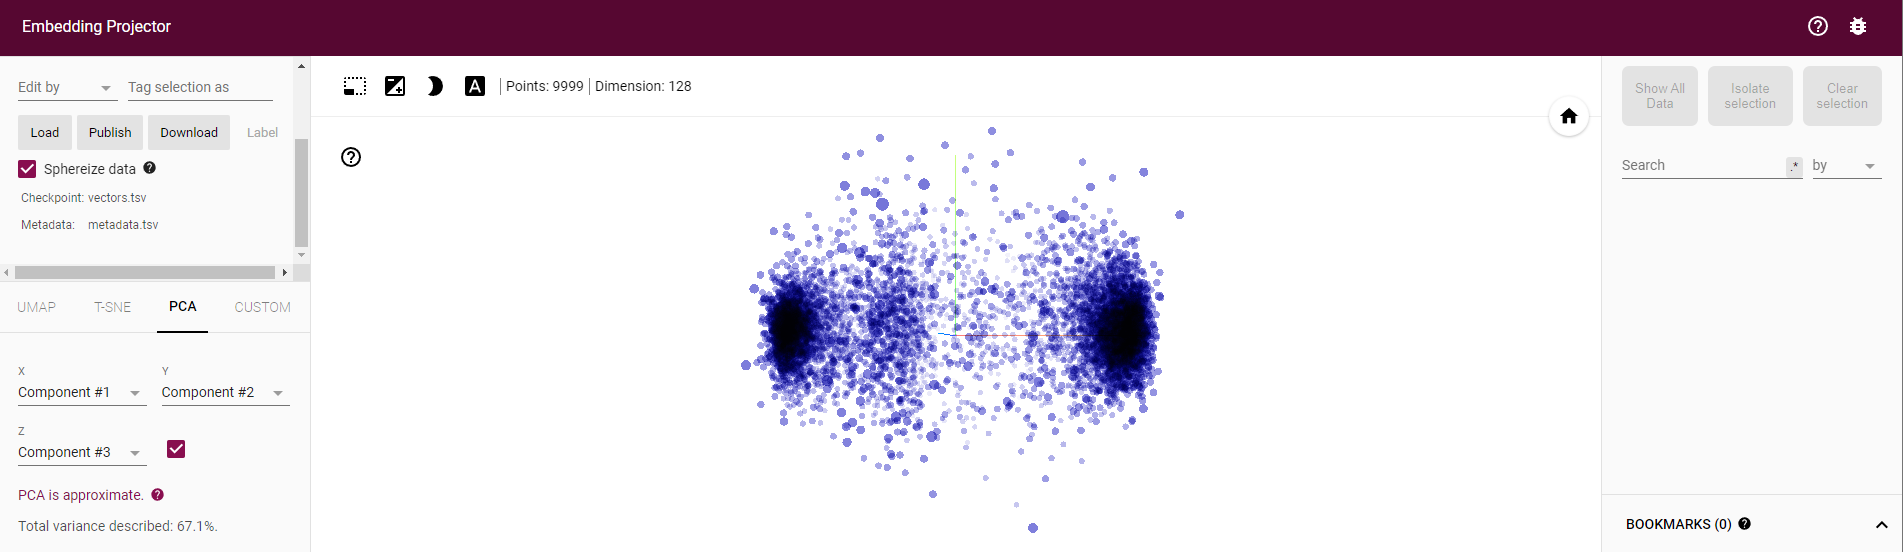

## Recurrent Neural Network

### Model 2 : LSTM (Long short term memory)

Structure of our model 

Input(text) -> Tokenize -> Embedding -> Layers (RNN/dense) -> output 

In [47]:
# Create a LSTM model

from tensorflow.keras import layers # type: ignore

inputs = tf.keras.layers.Input(shape=(1,),dtype='string') # type: ignore
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)

x = tf.keras.layers.LSTM(64,return_sequences=True)(x) # type: ignore
print(x.shape)
x = tf.keras.layers.LSTM(64)(x) # type: ignore

print(x.shape)
# x = layers.Dense(64,activation = 'relu')(x)

outputs = layers.Dense(1,activation ='sigmoid')(x)
model_2 = tf.keras.Model(inputs,outputs,name='model_2_LSTM') # type: ignore

(None, 15, 128)
(None, 15, 64)
(None, 64)


In [48]:
# Get a summary 
model_2.summary()

Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 15, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,362,497 (5.20 MB)

 Trainable params: 1,362,497 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Compile the model 
model_2.compile(loss =tf.keras.losses.BinaryCrossentropy(), # type: ignore
                optimizer=tf.keras.optimizers.Adam(), # type: ignore
                metrics=['accuracy'])

In [50]:
tf.device('/device:GPU:0')

In [51]:
print(tf.test.is_built_with_cuda())
print(tf.test.is_built_with_gpu_support())
print(tf.config.list_physical_devices('GPU'))

False
False
[]


In [52]:
# Fit the model 

model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,'LSTM')])

Saving TensorBoard log files to: model_logs/LSTM/20240711-120857
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8968 - loss: 0.2837 - val_accuracy: 0.7677 - val_loss: 0.6937
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9387 - loss: 0.1648 - val_accuracy: 0.7848 - val_loss: 0.6524
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9526 - loss: 0.1305 - val_accuracy: 0.7861 - val_loss: 0.6462
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9640 - loss: 0.1012 - val_accuracy: 0.7730 - val_loss: 0.8700
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9649 - loss: 0.0854 - val_accuracy: 0.7664 - val_loss: 0.9460


In [53]:
# Make predicitons with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


array([[2.8607520e-01],
       [8.2640588e-01],
       [9.9985582e-01],
       [6.9346488e-02],
       [2.1446485e-04],
       [9.9900812e-01],
       [9.8660338e-01],
       [9.9986559e-01],
       [9.9978977e-01],
       [3.6757165e-01]], dtype=float32)

In [54]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [55]:
# calculate model 2 results 

model_2_results = calculate_results(val_labels,model_2_preds)
model_2_results

{'accuracy': 76.64041994750657,
 'precision': 0.7660179630810368,
 'recall': 0.7664041994750657,
 'f1': 0.7658701917905647}

### Model 3: GRU  

In [56]:
# Build a RNN using the GRU cell 

from tensorflow.keras import layers #type:ignore

inputs = layers.Input(shape=(1,),dtype=tf.string)

x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.GRU(64,return_sequences=True)(x)
# x = layers.GRU(64)(x)
# print(x.shape)
# x = layers.LSTM(64,return_sequences=True)(x)
# print(x.shape)
# x = layers.GRU(64,return_sequences =True)(x)
# print(x.shape)
# x = layers.Dense(64,activation='relu')(x)

x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)

model_3 = tf.keras.Model(inputs,outputs,name ='model_3_GRU') # type: ignore

(None, 15, 128)


In [57]:
model_3.summary()

Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 15, 64)         │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Compile the  model 

model_3.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(), # type: ignore
                metrics =['accuracy'])

In [59]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs =5,
                              validation_data = (val_sentences,val_labels),
                              callbacks =[create_tensorboard_callback(SAVE_DIR,'model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20240711-120910
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9381 - loss: 0.2738 - val_accuracy: 0.7690 - val_loss: 0.6852
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9651 - loss: 0.0990 - val_accuracy: 0.7677 - val_loss: 0.7161
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9695 - loss: 0.0884 - val_accuracy: 0.7677 - val_loss: 0.9601
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9744 - loss: 0.0707 - val_accuracy: 0.7690 - val_loss: 0.9252
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9732 - loss: 0.0652 - val_accuracy: 0.7493 - val_loss: 1.0727


In [60]:
# Make some predictions with our Gru model 
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[1.2983233e-01],
       [8.2099879e-01],
       [9.9996305e-01],
       [2.3338327e-01],
       [6.4472295e-04],
       [9.9951798e-01],
       [9.4588381e-01],
       [9.9998844e-01],
       [9.9997538e-01],
       [9.3717080e-01]], dtype=float32)

In [61]:
# Convert model 3 pred probs to labels
model_3_pred = tf.squeeze(tf.round(model_3_pred_probs))
model_3_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [62]:
# Calculate model 3 results 
model_3_results = calculate_results(val_labels,model_3_pred)
model_3_results

{'accuracy': 74.93438320209974,
 'precision': 0.7492247249620504,
 'recall': 0.7493438320209974,
 'f1': 0.748024369633166}

### Model 4:  Bidirectional RNN model

In [63]:
# Build a Bidirectional RNN 

inputs = layers.Input(shape  =( 1,),dtype='string')

x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64,return_sequences = True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)

outputs = layers.Dense(1,activation='sigmoid')(x)

model_4 = tf.keras.Model(inputs,outputs,name ='model_4_Bidirectional') # type: ignore


In [64]:
# summary of model_4
model_4.summary()

Model: "model_4_Bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 15, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,453,441 (5.54 MB)

 Trainable params: 1,453,441 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# compile the model

model_4.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(), # type: ignore
                metrics = ['accuracy'])

In [66]:
# Fit the model 

model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs =5,
                              validation_data = (val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,'model_4_Bidirectional')])

Saving TensorBoard log files to: model_logs/model_4_Bidirectional/20240711-120920
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9563 - loss: 0.1749 - val_accuracy: 0.7677 - val_loss: 1.0108
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9747 - loss: 0.0590 - val_accuracy: 0.7598 - val_loss: 1.3677
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9787 - loss: 0.0527 - val_accuracy: 0.7612 - val_loss: 1.6148
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9780 - loss: 0.0446 - val_accuracy: 0.7756 - val_loss: 1.3409
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9814 - loss: 0.0420 - val_accuracy: 0.7730 - val_loss: 1.4072


In [67]:
# make prediction
model_4_preds_probs = model_4.predict(val_sentences)
model_1_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


array([[0.405288  ],
       [0.7609563 ],
       [0.9977134 ],
       [0.15474908],
       [0.11537637],
       [0.9441804 ],
       [0.9209456 ],
       [0.99112207],
       [0.9658233 ],
       [0.33344963]], dtype=float32)

In [68]:
# Convert pred probs to pred labels
model_4_preds= tf.squeeze(tf.round(model_4_preds_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [69]:
model_4_results = calculate_results(val_labels,model_4_preds)
model_4_results

{'accuracy': 77.29658792650919,
 'precision': 0.7745161732477092,
 'recall': 0.7729658792650919,
 'f1': 0.7709704727215051}

## Convolution Neural Networks

### Model_5 :Conv1D

In [70]:
# Test out our embedding layer , conv1D layer and max pooling
embedding_test = embedding(text_vectorizer(['This is a test sentence']))

conv_1d = layers.Conv1D(filters=32,
                        kernel_size = 5,
                        activation ='relu',
                        padding ='valid')

conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalAveragePooling1D()
max_pool_output =max(conv_1d_output)

embedding_test.shape , conv_1d_output.shape ,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([11, 32]))

In [71]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00924113, -0.03308373,  0.00721498, ..., -0.01867368,
          0.02736903,  0.01783836],
        [ 0.01211126, -0.031695  ,  0.02079573, ...,  0.04448867,
         -0.00450961, -0.01308519],
        [ 0.01169195, -0.02890311, -0.00317292, ...,  0.04182908,
         -0.01500092,  0.03863859],
        ...,
        [ 0.05416177, -0.02492434, -0.02428975, ...,  0.01741622,
         -0.00621868,  0.03461811],
        [ 0.05416177, -0.02492434, -0.02428975, ...,  0.01741622,
         -0.00621868,  0.03461811],
        [ 0.05416177, -0.02492434, -0.02428975, ...,  0.01741622,
         -0.00621868,  0.03461811]]], dtype=float32)>

In [72]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.00561906, 0.02351488, 0.        , 0.        , 0.        ,
         0.04443358, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.01000328, 0.02841006,
         0.00236153, 0.        , 0.07478214, 0.0843576 , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.02870919,
         0.02234747, 0.0150573 , 0.02547628, 0.        , 0.        ,
         0.02190509, 0.        ],
        [0.        , 0.01154257, 0.01974827, 0.        , 0.        ,
         0.03465716, 0.        , 0.05137592, 0.04642496, 0.0007714 ,
         0.        , 0.02722528, 0.        , 0.        , 0.        ,
         0.01938529, 0.        , 0.0176517 , 0.02994369, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.05850027,
         0.00540123, 0.03328169, 0.0245837 , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.01159899, 0.        , 0.    

In [73]:
tf.random.set_seed(42)
from tensorflow.keras import layers # type: ignore

model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers # type: ignore

inputs = layers.Input(shape=(1,), dtype="string")

x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer

outputs = layers.Dense(1, activation="sigmoid")(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D") # type: ignore

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # type: ignore
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

c:\Users\admin\miniconda3\envs\tf_new\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "model_5_Conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_5 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 11, 32)         │        20,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,300,545 (4.96 MB)

 Trainable params: 1,300,545 (4.96 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences,val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       'Conv_1D')])

Saving TensorBoard log files to: model_logs/Conv_1D/20240711-120938
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6558 - loss: 0.6288 - val_accuracy: 0.7874 - val_loss: 0.4702
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8446 - loss: 0.3740 - val_accuracy: 0.7808 - val_loss: 0.4767
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9157 - loss: 0.2346 - val_accuracy: 0.7835 - val_loss: 0.5336
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9514 - loss: 0.1490 - val_accuracy: 0.7808 - val_loss: 0.6060
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9676 - loss: 0.1014 - val_accuracy: 0.7874 - val_loss: 0.6536


In [75]:
# make some predctions with our Conv1D model
model_5_preds_probs = model_5.predict(val_sentences)
model_5_preds_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.54036546],
       [0.85155797],
       [0.9997778 ],
       [0.06068578],
       [0.00167083],
       [0.9838314 ],
       [0.96618307],
       [0.99894655],
       [0.9964145 ],
       [0.25566146]], dtype=float32)

In [76]:
# Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_preds_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [77]:
model_5_results = calculate_results(val_labels,model_5_preds)
model_5_results

{'accuracy': 78.74015748031496,
 'precision': 0.790739069704199,
 'recall': 0.7874015748031497,
 'f1': 0.784968634594908}

## Model 6: Tensorflow Hub Pretrained sentence Encoder

In [78]:
import tensorflow_hub as hub

embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2") # type: ignore
embed_samples = embed(['when you can the universal sentence encoder on a sentence ,it']) # type: ignore
print(embed_samples[0][:50])

tf.Tensor(
[ 0.03887611 -0.04489138 -0.01007334  0.02513491  0.03211078 -0.05403521
 -0.06051528  0.03846889  0.0694048   0.04857901 -0.02727928 -0.03067
  0.01887525  0.07760568  0.06726807 -0.10037912  0.0055118  -0.01405655
  0.01257763  0.0200272   0.03841469  0.03748363  0.05209327  0.04246923
 -0.0884784   0.0886801  -0.02672762 -0.02115642  0.00267457  0.01863117
  0.04907304  0.02767001 -0.03060434 -0.03465237 -0.09556456 -0.02171784
  0.08469554  0.06951755 -0.00477826 -0.02748327  0.00991354 -0.0378137
  0.06140835 -0.01993573 -0.02914741 -0.00867546 -0.00956881 -0.03996287
 -0.04141346 -0.02393234], shape=(50,), dtype=float32)


In [79]:
# Create  keras layers and USE pretrained layer from tensoflow hub

sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2", # type: ignore
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = 'USE')

In [80]:
# model_6 = tf.keras.Sequential([
#     # sentence_enoder_layer,
#     hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2", # type: ignore
#                                         input_shape = [],
#                                         dtype = tf.string,
#                                         trainable = False,
#                                         name = 'USE'),
#     layers.Dense(64,activation ='relu'),
#     layers.Dense(1,activation='sigmoid',name = 'output_layer')  
# ],name = 'model_6_USE')

# # compile the model
# model_6.compile(loss ='binary_crossentropy',
#                 optimizer = tf.keras.optimizers.Adam(),
#                 metrics =['accuracy'])

# model_6.summary()

In [81]:
# sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
#                                         input_shape=[], # shape of inputs coming to our model 
#                                         dtype=tf.string, # data type of inputs coming to the USE layer
#                                         trainable=False, # keep the pretrained weights (we'll create a feature extractor)
#                                         name="USE") 

In [82]:
# create a model using sequential model

import tf_keras as keras # type: ignore

model_6 = keras.Sequential([
    sentence_encoder_layer,
    keras.layers.Dense(64,activation ='relu'),
    keras.layers.Dense(1,activation='sigmoid',name = 'output_layer')  
],name = 'model_6_USE')

# compile the model
model_6.compile(loss ='binary_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics =['accuracy'])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [83]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels))
                            #   callbacks=[create_tensorboard_callback(SAVE_DIR,'tf_hub_sentence_encoder')])
                            # right now we cant create callback as keras model is not compatible with tensorboard
                            

Epoch 1/5



215/215 [==============================] - 11s 6ms/step - loss: 0.5060 - accuracy: 0.7841 - val_loss: 0.4479 - val_accuracy: 0.7940
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4149 - accuracy: 0.8143 - val_loss: 0.4370 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3997 - accuracy: 0.8216 - val_loss: 0.4327 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3920 - accuracy: 0.8251 - val_loss: 0.4287 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 1s 3ms/step - loss: 0.3854 - accuracy: 0.8302 - val_loss: 0.4296 - val_accuracy: 0.8136


In [84]:
# Make prediction 
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.14646576],
       [0.75124675],
       [0.9895956 ],
       [0.18683387],
       [0.7511745 ],
       [0.67109334],
       [0.9802306 ],
       [0.9772841 ],
       [0.9268191 ],
       [0.09434953]], dtype=float32)

In [85]:
model_6_pred = tf.squeeze(tf.round(model_6_pred_probs))
model_6_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [86]:
# Calculate results 
model_6_results = calculate_results(val_labels,model_6_pred)
model_6_results

{'accuracy': 81.36482939632546,
 'precision': 0.8160661319598898,
 'recall': 0.8136482939632546,
 'f1': 0.8120618868299143}

In [87]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 7 : TF Hub pretrained USE with 10% of training data

In [88]:
# create subsets of 10% of training data
## CAUTION DATA LEAKAGE BELOW
# train_10_percent = train_df_shuffled[['text','target']].sample(frac=0.1,random_state=42)
# # train_10_percent.head()
# train_sentences_10_percent = train_10_percent['text'].to_list()
# train_labels_10_percent = train_10_percent['target'].to_list()

In [89]:
train_10_percent_split = int(0.1*len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_sentences_10_percent[:10]

train_labels_10_percent = train_labels[:train_10_percent_split]
train_labels_10_percent[:10]


array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [90]:
# Check the number of target in our subset of data
# train_sentences_10_percent['target'].value_counts()

To recreate a model the same as a previous model we can use tf.clone_model()

In [91]:
# lets build a model same as model_6
# model_7 = tf.keras.models.clone_model(model_6) # type: ignore

# # compile the model
# model_7.compile(loss = 'binary_crossentropy',
#                 optimizer = tf.keras.optimizers.Adam(),
#                 metrics = ['accuracy'])

# model_7.summary()


In [92]:

import tf_keras as keras # type: ignore

model_7 = keras.Sequential([
    sentence_encoder_layer,
    keras.layers.Dense(64,activation ='relu'),
    keras.layers.Dense(1,activation='sigmoid',name = 'output_layer')  
],name = 'model_6_USE')

# compile the model
model_7.compile(loss ='binary_crossentropy',
                optimizer = keras.optimizers.Adam(),
                metrics =['accuracy'])

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [93]:
# fit the model
model_7_history = model_7.fit(train_sentences_10_percent, # type: ignore
                              train_labels_10_percent, # type: ignore
                              epochs=5,
                              validation_data=(val_sentences,val_labels))

Epoch 1/5
22/22 [==============================] - 2s 28ms/step - loss: 0.6704 - accuracy: 0.6876 - val_loss: 0.6445 - val_accuracy: 0.7651
Epoch 2/5
22/22 [==============================] - 0s 8ms/step - loss: 0.5984 - accuracy: 0.8117 - val_loss: 0.5862 - val_accuracy: 0.7769
Epoch 3/5
22/22 [==============================] - 0s 8ms/step - loss: 0.5212 - accuracy: 0.8263 - val_loss: 0.5311 - val_accuracy: 0.7835
Epoch 4/5
22/22 [==============================] - 0s 8ms/step - loss: 0.4594 - accuracy: 0.8219 - val_loss: 0.5007 - val_accuracy: 0.7835
Epoch 5/5
22/22 [==============================] - 0s 7ms/step - loss: 0.4183 - accuracy: 0.8321 - val_loss: 0.4845 - val_accuracy: 0.7808


In [94]:
# make predictions with model trained on 10% of the data 
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[0.19616182],
       [0.5712457 ],
       [0.9209229 ],
       [0.35954925],
       [0.55034494],
       [0.72326744],
       [0.8911662 ],
       [0.84771955],
       [0.84458524],
       [0.1559455 ]], dtype=float32)

In [95]:
# turn pred probs into labels
model_7_pred = tf.squeeze(tf.round(model_7_pred_probs))
model_7_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [96]:
# evaluate model 7 results 
model_7_results = calculate_results(val_labels,model_7_pred)
model_7_results

{'accuracy': 78.08398950131233,
 'precision': 0.7823342077218286,
 'recall': 0.7808398950131233,
 'f1': 0.7790338643605079}

## Comparing the performance of each of our models

In [100]:
# combine model results into a Dataframe
all_model_results = pd.DataFrame({'0_baseline':baseline_results,
                                  '1_simple_dense': model_1_results,
                                  '2_lstm':model_2_results,
                                  '3_gru':model_3_results,
                                  '4_bdirectional':model_4_results,
                                  '5_conv1d':model_5_results,
                                  '6_tf_hub_use_encoder':model_6_results,
                                  '7_tf_hub_use_encoder_10_percent':model_7_results,
                                  })
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.083990,0.784127,0.780840,0.778263
2_lstm,76.640420,0.766018,0.766404,0.765870
3_gru,74.934383,0.749225,0.749344,0.748024
4_bdirectional,77.296588,0.774516,0.772966,0.770970
5_conv1d,78.740157,0.790739,0.787402,0.784969
6_tf_hub_use_encoder,81.364829,0.816066,0.813648,0.812062
7_tf_hub_use_encoder_10_percent,78.083990,0.782334,0.780840,0.779034


In [101]:
# reduce the accuracy to the same scale as others metrics
all_model_results['accuracy'] = all_model_results['accuracy']/100
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.780840,0.784127,0.780840,0.778263
2_lstm,0.766404,0.766018,0.766404,0.765870
3_gru,0.749344,0.749225,0.749344,0.748024
4_bdirectional,0.772966,0.774516,0.772966,0.770970
5_conv1d,0.787402,0.790739,0.787402,0.784969
6_tf_hub_use_encoder,0.813648,0.816066,0.813648,0.812062
7_tf_hub_use_encoder_10_percent,0.780840,0.782334,0.780840,0.779034


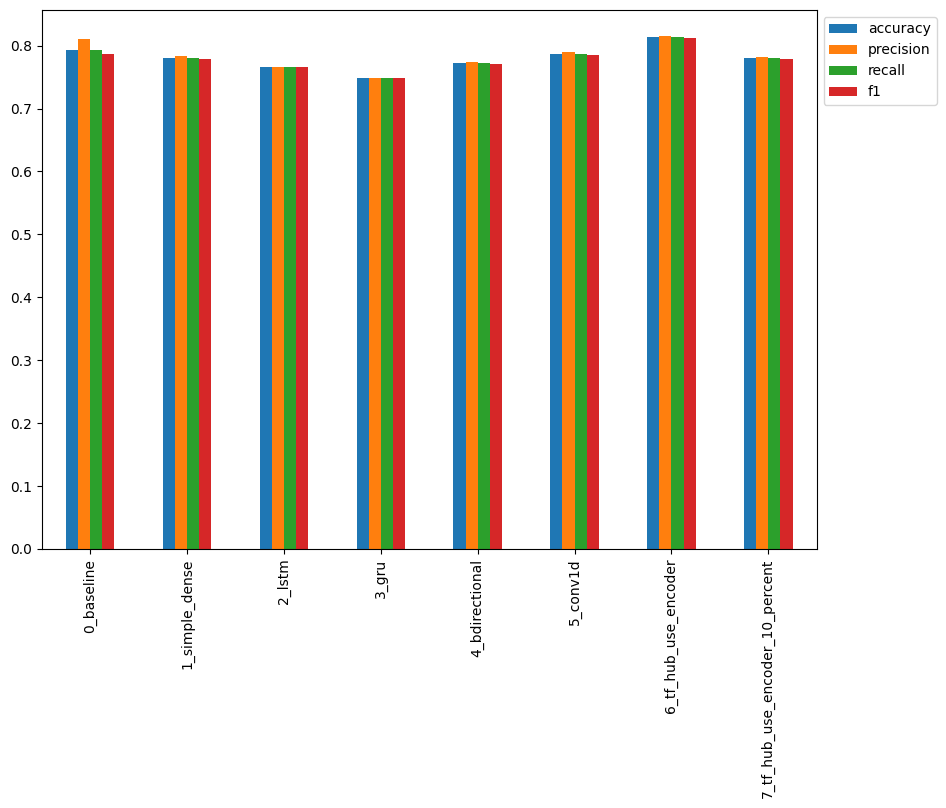

In [105]:
# plot and compare 
all_model_results.plot(kind ='bar',figsize=(10,7)).legend(bbox_to_anchor =(1.0,1.0));

<Axes: >

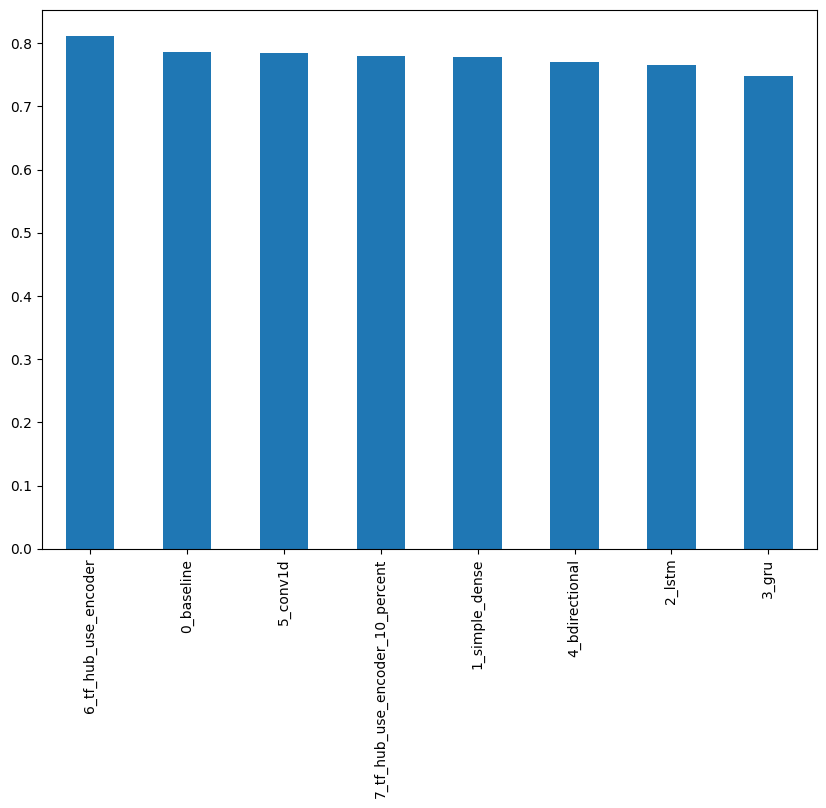

In [106]:
all_model_results.sort_values('f1',ascending=False)['f1'].plot(kind ='bar',figsize=(10,7))

In [107]:
model_6.save('model_6.h5')

c:\Users\admin\miniconda3\envs\tf_new\Lib\site-packages\tf_keras\src\engine\training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [111]:
loaded_model_6 = keras.models.load_model('model_6.h5',custom_objects= {'KerasLayer': hub.KerasLayer})

In [112]:
loaded_model_6.evaluate(val_sentences,val_labels) # type: ignore

24/24 [==============================] - 1s 6ms/step - loss: 0.4296 - accuracy: 0.8136


[0.42955124378204346, 0.8136482834815979]

## Finding the most wrong examples

In [113]:
unzip_data('08_model_6_USE_feature_extractor.zip')

In [119]:
# # import model 
# # model_6_pretrained  = tf.keras.models.load_model('08_model_6_USE_feature_extractor')
# model_6_pretrained  = tf.keras.models.load_model('08_model_6_USE_feature_extractor/saved_model.pb')
# model_6_pretrained.evaluate(val_sentences,val_labels)
# ValueError: File format not supported: filepath=08_model_6_USE_feature_extractor/saved_model.pb. Keras 3 only supports V3 `.keras` files and legacy H5 format files

In [118]:
model_6_pretrained = model_6
model_6_pretrained.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 7ms/step - loss: 0.4296 - accuracy: 0.8136


[0.42955124378204346, 0.8136482834815979]

In [120]:
# make predictions with loed model 
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_pred = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_pred[:10]

24/24 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [123]:
# create dataframe with validation labels and best performing model prediction 
val_df = pd.DataFrame({'text':val_sentences,
                      'target': val_labels,
                      'pred': model_6_pretrained_pred,
                      'pred_prob':tf.squeeze(model_6_pretrained_pred_probs)
                      })
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.146466
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.751247
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.989596
3,@camilacabello97 Internally and externally scr...,1,0.0,0.186834
4,Radiation emergency #preparedness starts with ...,1,1.0,0.751175


In [126]:
# find the wrong predictions and sort by prediction probabilites
most_wrong = val_df[val_df['target']!= val_df['pred']].sort_values('pred_prob',ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.917392
628,@noah_anyname That's where the concentration c...,0,1.0,0.874003
759,FedEx will no longer transport bioterror patho...,0,1.0,0.872239
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.850641
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.832670
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.810354
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.803108
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.784090
567,@RebeccaforReal accepts Wisconsin Emergency Re...,0,1.0,0.777506
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.777150


In [127]:
most_wrong.tail()

,text,target,pred,pred_prob
233,I get to smoke my shit in peace,1,0.0,0.046018
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.042985
38,Why are you deluged with low self-image? Take ...,1,0.0,0.041912
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.038229
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.034579


In [128]:
# check the false positives 

for row in most_wrong[:10].itertuples():
    _,text,target,pred,pred_prob = row
    print(f'Target:{target},Pred: {pred} ,Prob: {pred_prob}')
    print(f'Text:\n{text}\n')
    print('-------\n')

Target:0,Pred: 1.0 ,Prob: 0.9173921346664429
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

-------

Target:0,Pred: 1.0 ,Prob: 0.874002993106842
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

-------

Target:0,Pred: 1.0 ,Prob: 0.8722385168075562
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

-------

Target:0,Pred: 1.0 ,Prob: 0.8506408333778381
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

-------

Target:0,Pred: 1.0 ,Prob: 0.8326703906059265
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

-------

Target:0,Pred: 1.0 ,Prob: 0.8103539347648621
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

-------

Targe

In [131]:
# False negatives

for row in most_wrong[-10:].itertuples():
    _,text,target,pred,pred_prob = row
    print(f'Target:{target},Pred: {pred} ,Prob: {pred_prob}')
    print(f'Text:\n{text}\n')
    print('-------\n')

Target:1,Pred: 0.0 ,Prob: 0.06556437909603119
Text:
Next May I'll be free...from school from obligations like family.... Best of all that damn curfew...

-------

Target:1,Pred: 0.0 ,Prob: 0.06508157402276993
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

-------

Target:1,Pred: 0.0 ,Prob: 0.05565064400434494
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

-------

Target:1,Pred: 0.0 ,Prob: 0.05281532555818558
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

-------

Target:1,Pred: 0.0 ,Prob: 0.047700800001621246
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

-------

Target:1,Pred: 0.0 ,Prob: 0.04601812735199928
Text:
I get to smoke my shit in peace

-------

Target:1,Pred: 0.0 ,Prob

In [132]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## making predictions on test dataset

In [134]:
test_sentences = test_df['text'].tolist()
test_sample = random.sample(test_sentences,10)

for test_sample in test_sample:
    pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
    pred = tf.round(pred_prob)

    print(f'Pred:{int(pred)}, Prob:{pred_prob}') # type: ignore
    print(f'Text:\n{test_sample}\n')
    print('---------\n')


1/1 [==============================] - 0s 33ms/step
Pred:1, Prob:0.6504271030426025
Text:
@GreenLacey GodsLove &amp; #thankU my sister for RT of NEW VIDEO http://t.co/cybKsXHF7d The Coming Apocalyptic US Earthquake &amp; Tsunami

---------

1/1 [==============================] - 0s 30ms/step
Pred:0, Prob:0.12556201219558716
Text:
My license picture blown up is absolutely terrifying. http://t.co/0NVdzxQ2HF

---------

1/1 [==============================] - 0s 31ms/step
Pred:0, Prob:0.22675012052059174
Text:
Your brain is particularly vulnerable to trauma at two distinct ages http://t.co/RAv8iMVvZB via @qz

---------

1/1 [==============================] - 0s 29ms/step
Pred:1, Prob:0.8433022499084473
Text:
5.3 #Earthquake in South Of Fiji Islands. #iPhone users download the Earthquake app for more information http://t.co/V3aZWOAmzK

---------

1/1 [==============================] - 0s 29ms/step
Pred:0, Prob:0.11234099417924881
Text:
If John Bateman scores we riot... https://t.co/zuPz8ZlO

## The speed/score tradeoff

In [135]:
model_6_results

{'accuracy': 81.36482939632546,
 'precision': 0.8160661319598898,
 'recall': 0.8136482939632546,
 'f1': 0.8120618868299143}

In [136]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [138]:
# lets make  function to measure the time of prediction 
import time
def pred_timer(model,samples):

    start_time = time.perf_counter()
    model.predict(samples)
    end_time = time.perf_counter()
    total_time = end_time - start_time
    time_per_pred = total_time/len(samples)
    
    return total_time,time_per_pred



In [139]:
# calculte TF sentence Encoder time per pred
model_6_total_pred_timer , model_6_time_per_pred = pred_timer(model_6_pretrained,
                                                              val_sentences)
model_6_total_pred_timer,model_6_time_per_pred

24/24 [==============================] - 0s 4ms/step


(0.169061700002203, 0.00022186574803438714)

In [140]:
# calculte our baseline model times per pred
baseline_total_pred_time , baseline_time_per_pred = pred_timer(model_0,val_sentences)
baseline_total_pred_time,baseline_time_per_pred

(0.030484000002616085, 4.00052493472652e-05)

In [142]:
model_6_pretrained_results = calculate_results(val_labels,model_6_pretrained_pred)
model_6_pretrained_results

{'accuracy': 81.36482939632546,
 'precision': 0.8160661319598898,
 'recall': 0.8136482939632546,
 'f1': 0.8120618868299143}

Text(0, 0.5, 'f1-score')

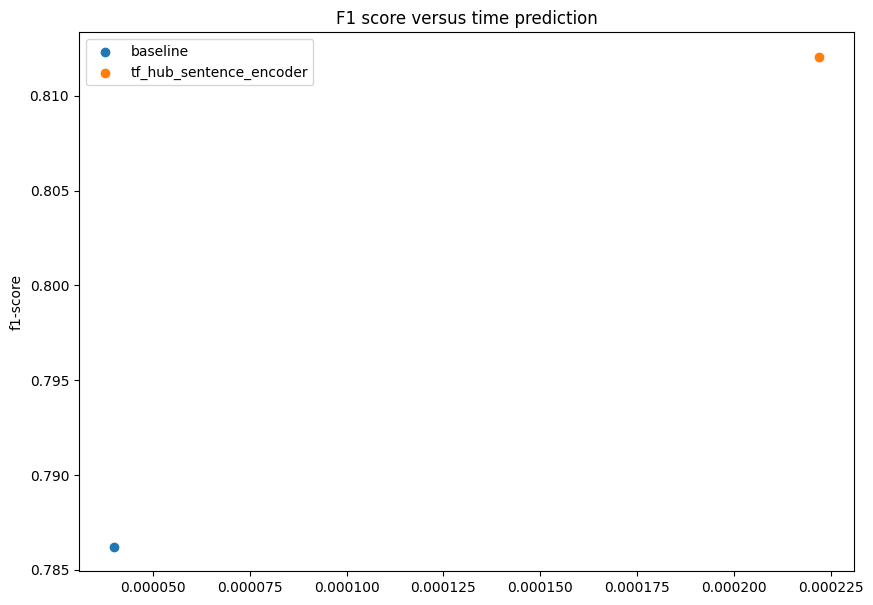

In [144]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,7))

plt.scatter(baseline_time_per_pred,baseline_results['f1'],label = 'baseline')
plt.scatter(model_6_time_per_pred,model_6_pretrained_results['f1'],label = 'tf_hub_sentence_encoder') # type: ignore
plt.legend()
plt.title('F1 score versus time prediction')
plt.ylabel('f1-score')

